In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics

In [2]:
def f(n):
    return 2*n*np.log(n)

In [3]:
df_mostly = pd.read_csv("optimized_mostly.csv")

dataList_mostly = df_mostly.to_numpy()
x_mostly = dataList_mostly[: , 0]
x_mostly = x_mostly.astype('int')

y_mostly = dataList_mostly[: , 1]
y_mostly = y_mostly.astype('int')

In [4]:
df_partial = pd.read_csv("optimized_partial.csv")

dataList_partial = df_partial.to_numpy()
x_partial = dataList_partial[: , 0]
x_partial = x_partial.astype('int')

y_partial = dataList_partial[: , 1]
y_partial = y_partial.astype('int')

In [5]:
df_random = pd.read_csv("optimized_random.csv")

dataList_random = df_random.to_numpy()
x_random = dataList_random[: , 0]
x_random = x_random.astype('int')

y_random = dataList_random[: , 1]
y_random = y_random.astype('int')
dataList_random

array([[   100,    627],
       [   100,    647],
       [   100,    650],
       ...,
       [ 10000, 154827],
       [ 10000, 145086],
       [ 10000, 147537]], dtype=int64)

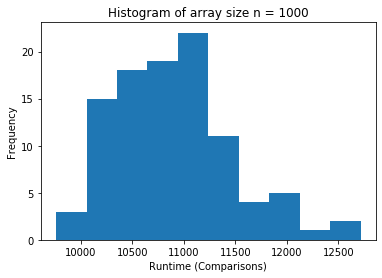

variance 500:  90336
variance 1000:  318642
variance 5000:  13126589
C^2 500:  18.942335919479977
C^2 1000:  29.22248716067498
C^2 5000:  186.05024520225643


In [6]:
plt.hist(dataList_random[dataList_random[:,0] == 1000][:,1])
plt.xlabel("Runtime (Comparisons)")
plt.ylabel("Frequency")
plt.title("Histogram of array size n = 1000")
plt.show()
print("variance 500: ", statistics.pvariance(dataList_random[dataList_random[:,0] == 500][:,1]))
print("variance 1000: ", statistics.pvariance(dataList_random[dataList_random[:,0] == 1000][:,1]))
print("variance 5000: ", statistics.pvariance(dataList_random[dataList_random[:,0] == 5000][:,1]))

print("C^2 500: ", statistics.pvariance(dataList_random[dataList_random[:,0] == 500][:,1]) / ((statistics.mean(dataList_random[dataList_random[:,0] == 500][:,1])^2)))
print("C^2 1000: ", statistics.pvariance(dataList_random[dataList_random[:,0] == 1000][:,1]) / ((statistics.mean(dataList_random[dataList_random[:,0] == 1000][:,1])^2)))
print("C^2 5000: ", statistics.pvariance(dataList_random[dataList_random[:,0] == 5000][:,1]) / ((statistics.mean(dataList_random[dataList_random[:,0] == 5000][:,1])^2)))

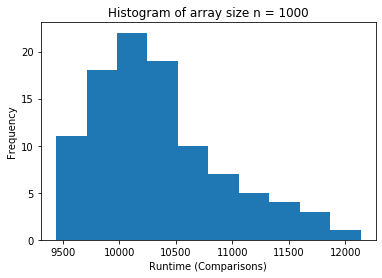

variance 500:  66398
variance 1000:  326224
variance 5000:  2067199
C^2 500:  14.71586879432624
C^2 1000:  31.58636715724245
C^2 5000:  32.228477440678496


In [7]:
plt.hist(dataList_partial[dataList_partial[:,0] == 1000][:,1])
plt.xlabel("Runtime (Comparisons)")
plt.ylabel("Frequency")
plt.title("Histogram of array size n = 1000")
plt.show()
print("variance 500: ", statistics.pvariance(dataList_partial[dataList_partial[:,0] == 500][:,1]))
print("variance 1000: ", statistics.pvariance(dataList_partial[dataList_partial[:,0] == 1000][:,1]))
print("variance 5000: ", statistics.pvariance(dataList_partial[dataList_partial[:,0] == 5000][:,1]))

print("C^2 500: ", statistics.pvariance(dataList_partial[dataList_partial[:,0] == 500][:,1]) / ((statistics.mean(dataList_partial[dataList_partial[:,0] == 500][:,1])^2)))
print("C^2 1000: ", statistics.pvariance(dataList_partial[dataList_partial[:,0] == 1000][:,1]) / ((statistics.mean(dataList_partial[dataList_partial[:,0] == 1000][:,1])^2)))
print("C^2 5000: ", statistics.pvariance(dataList_partial[dataList_partial[:,0] == 5000][:,1]) / ((statistics.mean(dataList_partial[dataList_partial[:,0] == 5000][:,1])^2)))

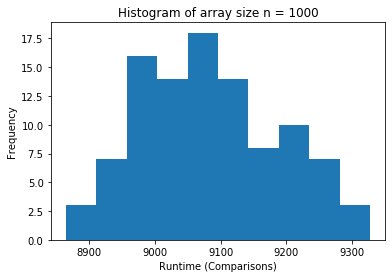

variance 500:  3630
variance 1000:  10794
variance 5000:  234527
C^2 500:  0.9061407888167748
C^2 1000:  1.1878507758336085
C^2 5000:  4.026629352379644


In [8]:
plt.hist(dataList_mostly[dataList_mostly[:,0] == 1000][:,1])
plt.xlabel("Runtime (Comparisons)")
plt.ylabel("Frequency")
plt.title("Histogram of array size n = 1000")
plt.show()
print("variance 500: ", statistics.pvariance(dataList_mostly[dataList_mostly[:,0] == 500][:,1]))
print("variance 1000: ", statistics.pvariance(dataList_mostly[dataList_mostly[:,0] == 1000][:,1]))
print("variance 5000: ", statistics.pvariance(dataList_mostly[dataList_mostly[:,0] == 5000][:,1]))

print("C^2 500: ", statistics.pvariance(dataList_mostly[dataList_mostly[:,0] == 500][:,1]) / ((statistics.mean(dataList_mostly[dataList_mostly[:,0] == 500][:,1])^2)))
print("C^2 1000: ", statistics.pvariance(dataList_mostly[dataList_mostly[:,0] == 1000][:,1]) / ((statistics.mean(dataList_mostly[dataList_mostly[:,0] == 1000][:,1])^2)))
print("C^2 5000: ", statistics.pvariance(dataList_mostly[dataList_mostly[:,0] == 5000][:,1]) / ((statistics.mean(dataList_mostly[dataList_mostly[:,0] == 5000][:,1])^2)))

In [9]:
avgData_random = []
for i in range(100,10100,100):
    avgData_random.append([i, sum(dataList_random[dataList_random[:,0] == i][:,1])/100])

avgData_partial = []
for i in range(100,10100,100):
    avgData_partial.append([i, sum(dataList_partial[dataList_partial[:,0] == i][:,1])/100])

avgData_mostly = []
for i in range(100,10100,100):
    avgData_mostly.append([i, sum(dataList_mostly[dataList_mostly[:,0] == i][:,1])/100])

In [10]:
avgData_random = np.array(avgData_random)
avgData_partial = np.array(avgData_partial)
avgData_mostly = np.array(avgData_mostly)

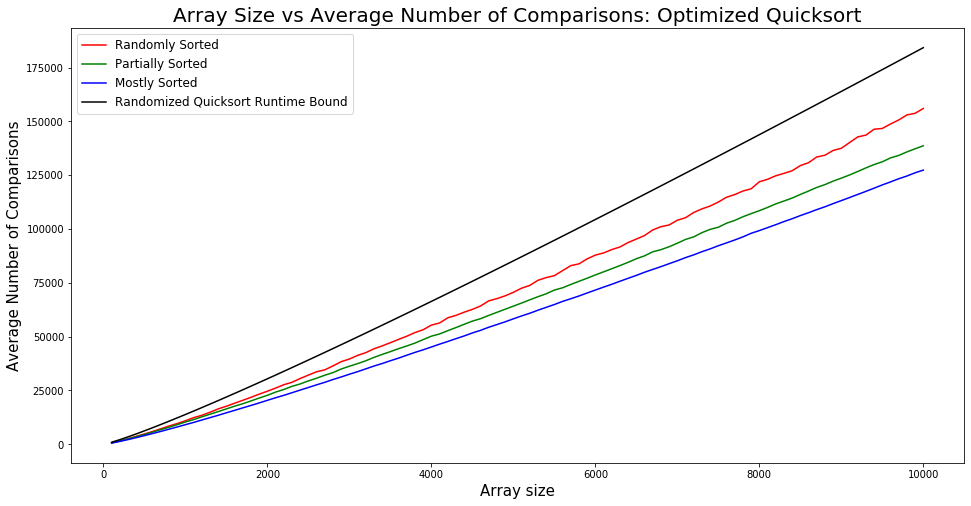

In [11]:
plt.figure(figsize=(16,8))
plt.title('Array Size vs Average Number of Comparisons: Optimized Quicksort', fontsize=20)

plt.plot(avgData_random[:,0], avgData_random[:,1], 'k', color = 'red', label="Randomly Sorted")
plt.plot(avgData_partial[:,0], avgData_partial[:,1], 'k', color = 'green', label="Partially Sorted")
plt.plot(avgData_mostly[:,0], avgData_mostly[:,1], 'k', color='blue', label="Mostly Sorted")
plt.plot(avgData_mostly[:,0], f(avgData_mostly[:,0]), 'k', color = 'black', label="Randomized Quicksort Runtime Bound")
plt.xlabel('Array size', fontsize=15)
plt.legend(loc="upper left", fontsize=12)
plt.ylabel('Average Number of Comparisons', fontsize=15)
plt.show()